In [1]:
import os
import ast
import random
import logging
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

from collections import OrderedDict
from tqdm import tqdm_notebook as tqdm

import sys
sys.path.append('..')

In [2]:
a = [(6, 0), (6, 1), (1, 2), (0, 3), (1, 4), (0, 5)]

In [3]:
b = [(30, 1), (30, 2), (2, 3), (1,3)]

In [4]:
G = nx.DiGraph()

In [5]:
G.add_edges_from(a)

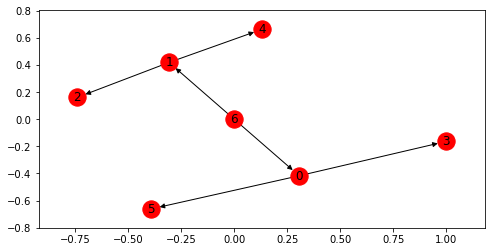

In [6]:
plt.figure(figsize=(8,4))
nx.draw_networkx(G, with_labels=True)

In [18]:
dist = nx.shortest_path_length(G, source = 6)

In [31]:
oe = {}
for k, v in dist.items():
    if v not in oe:
        oe[v] = [k]
    else:
        oe[v].append(k)
oe.pop(0)
oe.pop(max(oe.keys()))

[3, 5, 2, 4]

In [32]:
oe

{1: [0, 1]}

In [28]:
oe

{1: [0, 1], 2: [3, 5, 2, 4]}

In [7]:
shape = (1, 4)

In [8]:
y = nx.in_degree_centrality(G)

In [9]:
y

{6: 0.0,
 0: 0.16666666666666666,
 1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666}

In [10]:
root = []
min_v = min(y.values())
for k, v in y.items():
    if v == min_v:
        root.append(k)

In [11]:
w_dict = {}

In [12]:
for root_node in root:
    w = np.random.randn(*shape)
    w_dict[root_node] = w

for root_node in root:
    for child in G.successors(root_node):
        if child not in w_dict:
            noise = np.random.uniform(0.001, 0.005)
            w_dict[child] = w_dict[root_node] + noise
            root.append(child)

In [13]:
w_dict

{6: array([[ 0.30869536, -0.68444918, -1.80885204,  0.88864319]]),
 0: array([[ 0.3136149 , -0.67952964, -1.80393251,  0.89356273]]),
 1: array([[ 0.31062103, -0.68252351, -1.80692638,  0.89056885]]),
 2: array([[ 0.31266738, -0.68047716, -1.80488002,  0.89261521]]),
 3: array([[ 0.3110261 , -0.68211844, -1.80652131,  0.89097393]]),
 4: array([[ 0.31314948, -0.67999506, -1.80439793,  0.8930973 ]]),
 5: array([[ 0.31129505, -0.68184949, -1.80625235,  0.89124288]])}

In [14]:
for n in G.nodes():
    if len(list(G.successors(n))) == 0:
        print(n)

0
1
2
3
4
5


In [201]:
c = np.random.randn(2,3).fl

In [203]:
c.flatten().shape

(6,)

In [27]:
def BFS(s): 
    # applicable only for directed graphs
    visited = [0] * (len(G)) 
    traversal = []
    new_edges = []
    queue = [] 

    queue.append(s) 
    visited[s]+=1

    while queue: 

        s = queue.pop(0) 
        traversal.append(s)

        for i in G.neighbors(s): 
            queue.append(i) 
            visited[i] +=1
            if visited[i] != 1:
#                 new_edges.append((s, i+visited[i]+len(G)))
                new_edges.append((s, "{}-{}".format(s, i)))
            else:
                new_edges.append((s, i))
            
    return new_edges

In [28]:
new_edges = BFS(0)

In [29]:
r = nx.DiGraph()

In [30]:
r.add_edges_from(new_edges)

In [31]:
r.edges()

OutEdgeView([(0, 1), (0, 2), (1, 3), (2, '2-3')])

In [32]:
nx.is_tree(r)

True

In [34]:
import matplotlib.pyplot as plt

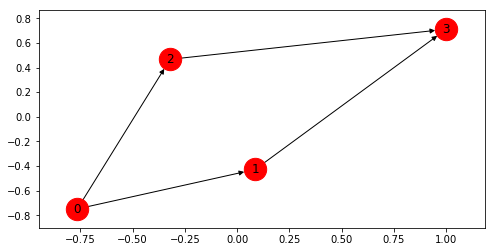

In [38]:
plt.figure(figsize=(8,4))
nx.draw_networkx(G, with_labels=True, node_size=500)